# Final Project Template

This workbook provides the template for the final project.

## Instructions
- Work individually or in pairs
- Each team is to complete 1 copy of this template.
  - Complete all sections.
  - Feel free to include supporting material / slides / documents as needed.
- At the end of the project, you will get 5 minutes to present this workbook to the class.

### Submission Instructions
- Submit the .ipynb with the Output cells showing the results
  - Naming convention:
  ```
      <name1>-<name2>-<project_short_name>.ipynb
  ```
- If you provide your own datasets, include the data with your .ipynb, unless it is confidential

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


## Section 0: Team Members
- Jing Jie Lim
- Nasruddin Islam Bin Ramli
- Ranjan Batra

## Section 1: Graduate Admission Prediction

- Graduate admission prediction based on applicant's scores, gpa and the university's rating

## Section 2: Project Definition

### Goals

Describe the goal of this project:

Predict graduate admission based on applicants' scores/gpa and the university's rating.

Important:
- If this is your first project, keep the project definition as simple as possible.
- As a rule of thumb, pick something that can be completed in 2-3 hours.
- If you are not sure, use the workshop problems as a reference.

### Dataset

URL: https://www.kaggle.com/mohansacharya/graduate-admissions  
Attributes:
- GRE Score
- TOEFL Score
- University Rating
- SOP
- LOR
- CGPA
- Research
- Target: Chance of Admit

### Tasks

List the tasks you will perform.

1. Explore the data
2. Determine balance of data
3. Shuffle and split into train and test sets
4. Train classification model using SGDClassifier, SVC
5. Compute classification report and plot confusion matrix for all models
6. Perform analysis for possible improvements

## Section 3: Data Engineering

Consider:
* Data Cleaning
* Data Exploration
* Imbalance / Data Sampling
* Data Encoding

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split, learning_curve, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score

In [ ]:
df = pd.read_csv('/gdrive/My Drive/kml-workshop/Admission_Predict.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
Serial No.           500 non-null int64
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(4), int64(5)
memory usage: 35.2 KB


In [ ]:
df1= df.drop(['Serial No.'], axis = 1)
df1.loc[df1['Chance of Admit ']> 0.7, 'Admitted'] = 1
df1.loc[df1['Chance of Admit ']<= 0.7, 'Admitted'] = 0
df1.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Admitted
0,337,118,4,4.5,4.5,9.65,1,0.92,1.0
1,324,107,4,4.0,4.5,8.87,1,0.76,1.0
2,316,104,3,3.0,3.5,8.00,1,0.72,1.0
3,322,110,3,3.5,2.5,8.67,1,0.80,1.0
4,314,103,2,2.0,3.0,8.21,0,0.65,0.0


In [ ]:
df1.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Admitted
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351,0.679429
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228,0.631663
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132,0.571017
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137,0.566482
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365,0.538494
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413,0.701471
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871,0.491159
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000,0.808357
Admitted,0.679429,0.631663,0.571017,0.566482,0.538494,0.701471,0.491159,0.808357,1.000000


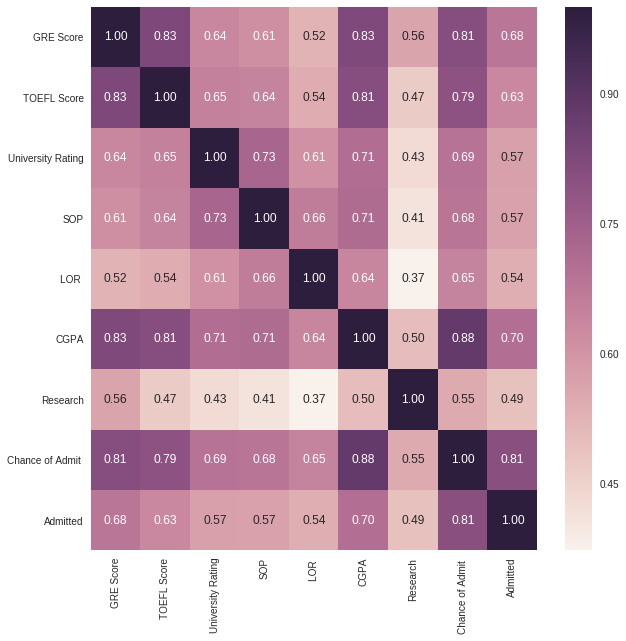

In [ ]:
fig, axes = plt.subplots(figsize=(10, 10))
sns.heatmap(df1.corr(), ax=axes, annot=True, fmt='.2f')

In [ ]:
X = df1.drop(['Chance of Admit ', 'Admitted'], axis = 1)
y = df1['Admitted']

## Section 4: Feature Engineering

Consider:
* Feature Reduction
* PCA plot in 2D

In [ ]:
from sklearn.decomposition import PCA

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


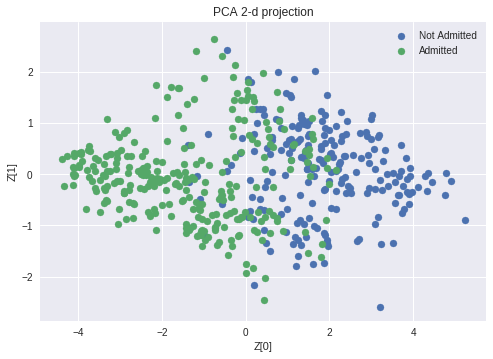

In [ ]:
# scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# pca
pca_2d = PCA(n_components=2)
Z_2d = pca_2d.fit_transform(X_scaled)

fig, ax = plt.subplots()

# dimension 0, dimension 1, label
ax.scatter(Z_2d[y==0, 0], Z_2d[y==0, 1], label='Not Admitted')
ax.scatter(Z_2d[y==1, 0], Z_2d[y==1, 1], label='Admitted')
ax.set(title='PCA 2-d projection', xlabel='Z[0]', ylabel='Z[1]')
ax.legend()

## Section 5: Model Engineering

Consider:
* Learning Curve to avoid Overfitting

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

# fit a separate X_scaler on the training set only
X_scaler = StandardScaler()
X_scaler.fit(X_train)

Z_train = X_scaler.transform(X_train)
Z_test = X_scaler.transform(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


[learning_curve] Training set sizes: [ 24  80 136 192 249]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.0s finished


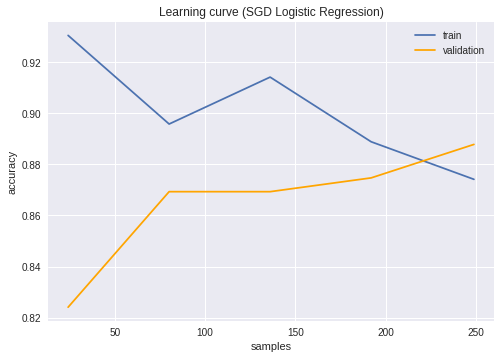

In [ ]:
sgd = SGDClassifier(tol=1e-3, random_state=42)
sample_sizes, train_scores, val_scores = learning_curve(sgd, Z_train, y_train, cv=3, verbose=1, random_state=42)

fig, ax = plt.subplots()

# Note: for classification model, scores are accuracy
# (for regression model, scores are r2)
ax.plot(sample_sizes, train_scores.mean(axis=1), label='train')
ax.plot(sample_sizes, val_scores.mean(axis=1), color='orange', label='validation')
ax.set(xlabel='samples', ylabel='accuracy', title='Learning curve (SGD Logistic Regression)')
ax.legend()

## Section 6: Evaluate Metrics

Consider:
* Which metric to use?

              precision    recall  f1-score   support

         0.0       0.73      0.83      0.78        53
         1.0       0.86      0.78      0.82        72

   micro avg       0.80      0.80      0.80       125
   macro avg       0.80      0.80      0.80       125
weighted avg       0.81      0.80      0.80       125



[Text(51.0, 0.5, 'Truth'), Text(0.5, 28.5, 'Prediction')]

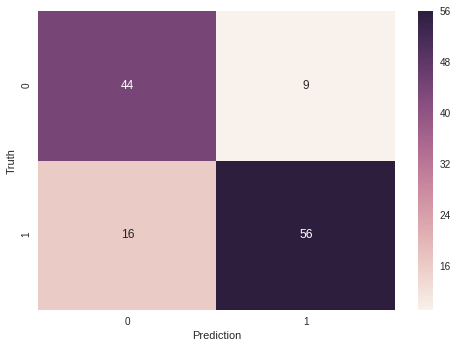

In [ ]:
sgd = SGDClassifier(tol=1e-3, random_state=42)
sgd.fit(Z_train, y_train)

pred_sgd = sgd.predict(Z_test)
print(classification_report(y_test, pred_sgd))
ax = sns.heatmap(confusion_matrix(y_test, pred_sgd), annot=True, fmt='d')
ax.set(xlabel='Prediction', ylabel='Truth')

              precision    recall  f1-score   support

         0.0       0.73      0.83      0.78        53
         1.0       0.86      0.78      0.82        72

   micro avg       0.80      0.80      0.80       125
   macro avg       0.80      0.80      0.80       125
weighted avg       0.81      0.80      0.80       125



[Text(51.0, 0.5, 'Truth'), Text(0.5, 28.5, 'Prediction')]

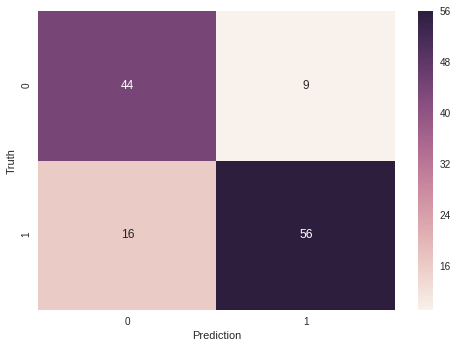

In [ ]:
# fit SVM classifier on all samples (based on learning curve)
svc = SVC(gamma='auto', random_state=42)
svc.fit(Z_train, y_train)

pred_svc = svc.predict(Z_test)
print(classification_report(y_test, pred_svc))

ax = sns.heatmap(confusion_matrix(y_test, pred_svc), annot=True, fmt='d')
ax.set(xlabel='Prediction', ylabel='Truth')

## Section 7: Observations and analysis

Answer the following questions:
1. What do you conclude from the metrics?

2. What improvements do you propose?

Based on the classification report, the model performs generally well on both classes (Admitted & Not Admitted). However, the precision for the 'Not Admitted' class is slightly low. This means the amount of false negatives is fairly high.

Some improvements that can be made is utilizing grid search to optimize/tune the hyperparameters of our baseline model. If no improvements are seen, we would suggest collecting more data (of both classes).